### Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set()

### First things first ! Read the dataset 

In [2]:
df = pd.read_csv("./movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### Get some info of dataset

In [3]:
display(df.shape)
df.info()

(5043, 28)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

### Lets remove unnecessary varibles

In [4]:
df.drop(["color",
         "director_facebook_likes",
         "actor_3_facebook_likes",
         "actor_1_facebook_likes",
         "cast_total_facebook_likes",
         "actor_2_facebook_likes",
         "facenumber_in_poster",
         "movie_imdb_link",
         "aspect_ratio",
         "plot_keywords",
         "country",
         "content_rating"], axis=1, inplace=True)
df.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,2701.0,English,250000000.0,2012.0,8.5,164000
4,Doug Walker,NaN,NaN,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,NaN,NaN,NaN,NaN,7.1,0


### Lets find and handle missing values

In [5]:
# Get missing values
# Get total number of missing values in each variable
total = df.isnull().sum().sort_values(ascending=False)

# Get percentage of missing values
percent = ((df.isnull().sum()/df.isnull().count())
           * 100).sort_values(ascending=False)

# Create dataframe for missing data
missing_data = pd.concat([total, percent], axis=1,
                         keys=["Total", "Percent (%)"])
missing_data

,Total,Percent (%)
gross,884,17.529248
budget,492,9.756098
title_year,108,2.141582
director_name,104,2.062265
num_critic_for_reviews,50,0.991473
actor_3_name,23,0.456078
num_user_for_reviews,21,0.416419
duration,15,0.297442
actor_2_name,13,0.257783
language,12,0.237954


### We observe that gross and budget have more percentage of missing values 
### Since gross and budget are very important we cant delete those variables 
### thus, we can remove the records where 

In [6]:
df = df[~ np.isnan(df["gross"])]
df = df[~ np.isnan(df["budget"])]

# Lets check columns for again for missing values
df.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

### Lets now delete rows where missing values are more than 2

In [7]:
df = df[df.isnull().sum(axis=1) <= 2]
df.isnull().sum()

director_name             0
num_critic_for_reviews    1
duration                  1
actor_2_name              2
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              7
num_user_for_reviews      0
language                  3
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

### Now its time to use Impute method to handle missing values

###  Numerical varibales - Mean

In [8]:
# num_critic_for_reviews and duration
df["num_critic_for_reviews"].fillna(
    df["num_critic_for_reviews"].mean(), inplace=True)
df["duration"].fillna(df["duration"].mean(), inplace=True)

### Categorical varibles - Mode

In [9]:
# language
df["language"].fillna(df["language"].mode()[0], inplace=True)

# actor_2_name and actor_3_name
df["actor_2_name"].fillna("Unknown Actor", inplace=True)
df["actor_3_name"].fillna("Unknown Actor", inplace=True)

In [10]:
# Again check for missing values
df.isnull().sum().sum()

0

### Lets drop duplicate records in order to maintain consistency

In [11]:
# drop duplicate records
df.drop_duplicates(subset=None, keep="first", inplace=True)

## 1. Let's find top 10 profitable movies having high gross

In [12]:
# Lets make a profit variable
df["profit"] = (df["gross"]/1000000)-(df["budget"]/1000000)
# df[["profit","movie_title"]].sort_values(by="profit",ascending=False).head(10)
df_top10_movies = df.sort_values(by="profit", ascending=False).head(10)
df_top10_movies = df_top10_movies[["movie_title", "profit"]]
df_top10_movies

,movie_title,profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061
439,The Hunger Games,329.999255


### Lets analyze language variable

In [13]:
df["language"].value_counts()

English       3673
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Persian          3
Dutch            3
Danish           3
Thai             3
Hebrew           3
Aboriginal       2
Dari             2
Indonesian       2
Swedish          1
None             1
Aramaic          1
Icelandic        1
Bosnian          1
Romanian         1
Maya             1
Filipino         1
Dzongkha         1
Telugu           1
Czech            1
Russian          1
Vietnamese       1
Hungarian        1
Arabic           1
Zulu             1
Mongolian        1
Kazakh           1
Name: language, dtype: int64

### So lets categorize langauages as English and Foreign as there are most of the English movies

In [14]:
# Create a function to be applied to the language variable
def set_language(language):
    if language == "English":
        return "English"
    else:
        return "Foreign"


# So now apply this function
df["language"] = df["language"].apply(set_language)
df["language"].value_counts()

English    3673
Foreign     180
Name: language, dtype: int64

### Lets manipulat duration variable

101.000000    113
100.000000    109
98.000000     105
95.000000      97
90.000000      97
             ... 
181.000000      1
183.000000      1
109.909442      1
236.000000      1
330.000000      1
Name: duration, Length: 157, dtype: int64

<AxesSubplot:ylabel='Frequency'>

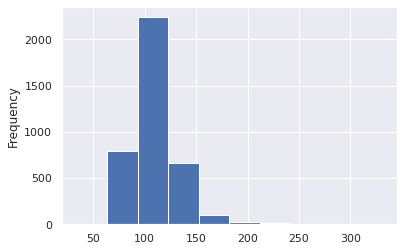

In [15]:
display(df["duration"].value_counts().sort_values(ascending=False))
# Plot the histogram to get data distribution
df["duration"].plot.hist()

### Lets categorize duration values

In [16]:
# create function to be applied
def set_duration(duration):
    if duration <= 120:
        return "Short"
    else:
        return "Long"


# apply function to duration
df["duration"] = df["duration"].apply(set_duration)
df["duration"].value_counts()

Short    2936
Long      917
Name: duration, dtype: int64

In [17]:
df.groupby(by=["language", "duration"]).count()

director_name  num_critic_for_reviews  actor_2_name  gross  \
language duration                                                               
English  Long                855                     855           855    855   
         Short              2818                    2818          2818   2818   
Foreign  Long                 62                      62            62     62   
         Short               118                     118           118    118   

                   genres  actor_1_name  movie_title  num_voted_users  \
language duration                                                       
English  Long         855           855          855              855   
         Short       2818          2818         2818             2818   
Foreign  Long          62            62           62               62   
         Short        118           118          118              118   

                   actor_3_name  num_user_for_reviews  budget  title_year  \
language duration                                                           
English  Long               855                   855     855         855   
         Short             2818                  2818    2818        2818   
Foreign  Long                62                    62      62          62   
         Short              118                   118     118         118   

                   imdb_score  movie_facebook_likes  profit  
language duration                                            
English  Long             855                   855     855  
         Short           2818                  2818    2818  
Foreign  Long              62                    62      62  
         Short            118                   118     118

### Lets manipaulate genres variables

In [18]:
display(df["genres"].value_counts())

# Lets split the genres into list
df["genres"].str.split("|")[0]

Drama                                       153
Comedy|Drama|Romance                        151
Comedy|Drama                                147
Comedy                                      145
Comedy|Romance                              135
                                           ... 
Adventure|Horror|Sci-Fi                       1
Action|Crime|Drama|History|Western            1
Adventure|Animation|Family|Thriller           1
Action|Drama|Mystery|Thriller                 1
Action|Adventure|Fantasy|Horror|Thriller      1
Name: genres, Length: 762, dtype: int64

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [19]:
# Create a new column named - movie_genres
df["movie_genres"] = df["genres"].str.split("|")
df["movie_genres"]

0            [Action, Adventure, Fantasy, Sci-Fi]
1                    [Action, Adventure, Fantasy]
2                   [Action, Adventure, Thriller]
3                              [Action, Thriller]
5                     [Action, Adventure, Sci-Fi]
                          ...                    
5033                    [Drama, Sci-Fi, Thriller]
5034                                   [Thriller]
5035    [Action, Crime, Drama, Romance, Thriller]
5037                              [Comedy, Drama]
5042                                [Documentary]
Name: movie_genres, Length: 3853, dtype: object

In [20]:
# Now lets create separate columns for genres
df["genre_1"] = df["movie_genres"].apply(lambda x: x[0])
df["genre_2"] = df["movie_genres"].apply(
    lambda x: x[1] if len(x) > 1 else x[0])
df["genre_3"] = df["movie_genres"].apply(
    lambda x: x[2] if len(x) > 2 else x[0])
df["genre_4"] = df["movie_genres"].apply(
    lambda x: x[3] if len(x) > 3 else x[0])
df.head(10)

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,...,budget,title_year,imdb_score,movie_facebook_likes,profit,movie_genres,genre_1,genre_2,genre_3,genre_4
0,James Cameron,723.0,Long,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,...,237000000.0,2009.0,7.9,33000,523.505847,"[Action, Adventure, Fantasy, Sci-Fi]",Action,Adventure,Fantasy,Sci-Fi
1,Gore Verbinski,302.0,Long,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,...,300000000.0,2007.0,7.1,0,9.404152,"[Action, Adventure, Fantasy]",Action,Adventure,Fantasy,Action
2,Sam Mendes,602.0,Long,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,...,245000000.0,2015.0,6.8,85000,-44.925825,"[Action, Adventure, Thriller]",Action,Adventure,Thriller,Action
3,Christopher Nolan,813.0,Long,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,...,250000000.0,2012.0,8.5,164000,198.130642,"[Action, Thriller]",Action,Thriller,Action,Action
5,Andrew Stanton,462.0,Long,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,...,263700000.0,2012.0,6.6,24000,-190.641321,"[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi,Action
6,Sam Raimi,392.0,Long,James Franco,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,Kirsten Dunst,...,258000000.0,2007.0,6.2,0,78.530303,"[Action, Adventure, Romance]",Action,Adventure,Romance,Action
7,Nathan Greno,324.0,Short,Donna Murphy,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,M.C. Gainey,...,260000000.0,2010.0,7.8,29000,-59.192738,"[Adventure, Animation, Comedy, Family, Fantasy...",Adventure,Animation,Comedy,Family
8,Joss Whedon,635.0,Long,Robert Downey Jr.,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,Scarlett Johansson,...,250000000.0,2015.0,7.5,118000,208.991599,"[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi,Action
9,David Yates,375.0,Long,Daniel Radcliffe,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,Rupert Grint,...,250000000.0,2009.0,7.5,10000,51.956980,"[Adventure, Family, Fantasy, Mystery]",Adventure,Family,Fantasy,Mystery
10,Zack Snyder,673.0,Long,Lauren Cohan,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,Alan D. Purwin,...,250000000.0,2016.0,6.9,197000,80.249062,"[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi,Action


### Lets calculate social media popularity

In [21]:
df["social_media_popularity"] = (
    (df["num_user_for_reviews"]/df["num_voted_users"])*df["movie_facebook_likes"])
df["social_media_popularity"] = df["social_media_popularity"]/10000
df["social_media_popularity"]

0       0.011372
1       0.000000
2       0.030627
3       0.038709
5       0.008347
          ...   
5033    0.009704
5034    0.000440
5035    0.000000
5037    0.000432
5042    0.000894
Name: social_media_popularity, Length: 3853, dtype: float64

,index,movie_title,social_media_popularity
0,10,Batman v Superman: Dawn of Justice,0.159979
1,150,Ghostbusters,0.107634
2,1582,Ghostbusters,0.107583
3,96,Interstellar,0.102456
4,3015,10 Days in a Madhouse,0.082803
5,945,Into the Woods,0.069294
6,73,Suicide Squad,0.065282
7,1190,Fifty Shades of Grey,0.062431
8,108,Warcraft,0.062279
9,92,Independence Day: Resurgence,0.059927


/home/amol/Amol/Python/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


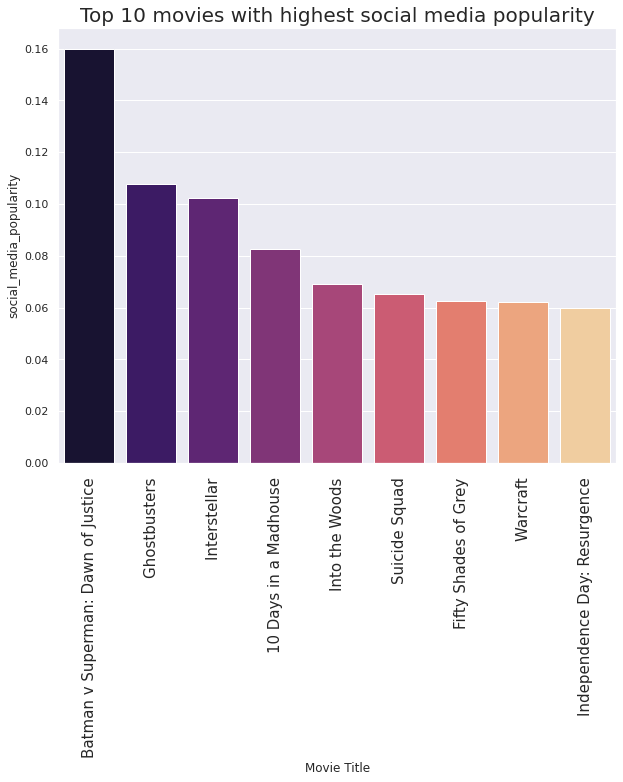

In [22]:
# Lets get top 10 movies having most popularity
x = df[["movie_title", "social_media_popularity"]].sort_values(
    by="social_media_popularity", ascending=False).head(10).reset_index()
display(x)

# Plot a bargraph
plt.figure(figsize=(10, 8))
sns.barplot(x["movie_title"], x["social_media_popularity"], palette="magma")
plt.title("Top 10 movies with highest social media popularity", fontsize=20)
plt.xlabel("Movie Title")
plt.xticks(rotation=90, fontsize=15)
plt.show()

### Lets find which genre impacts movies world

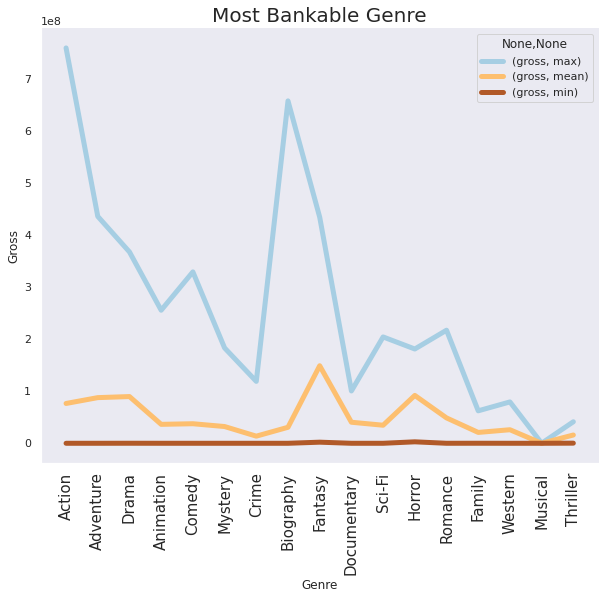

In [23]:
# Group the genres and get min max avg of gross
genre1_gross = df[["genre_1", "gross", ]].groupby(["genre_1"]).agg(
    ["max", "mean", "min"]).style.background_gradient(cmap="Greens")
display(genre1_gross)

# Plot line graph
sns.set_style("dark")

df[["genre_1", "gross", ]].groupby(["genre_1"]).agg(
    ["max", "mean", "min"]).plot(kind="line", colormap="Paired", figsize=(10, 8), linewidth=5)
plt.title("Most Bankable Genre", fontsize=20)
plt.xlabel("Genre")
plt.ylabel("Gross")
plt.xticks(np.arange(17), df["genre_1"].unique(), rotation=90, fontsize=15)
sns.despine()
plt.show()

### Get most profitable movie of each genre

In [24]:
print("Most profitable movie of each genre")
display(df.loc[df.groupby(["genre_1"])["profit"].idxmax()][[
        "genre_1", "movie_title", "gross"]].style.background_gradient(cmap="Greens"))

Most profitable movie of each genre


,genre_1,movie_title,gross
0,Action,Avatar,760505847.000000
509,Adventure,The Lion King,422783777.000000
521,Animation,Despicable Me 2,368049635.000000
1403,Biography,The Blind Side,255950375.000000
836,Comedy,Forrest Gump,329691196.000000
3466,Crime,The Godfather,134821952.000000
3583,Documentary,Fahrenheit 9/11,119078393.000000
26,Drama,Titanic,658672302.000000
3080,Family,E.T. the Extra-Terrestrial,434949459.000000
2485,Fantasy,The Others,96471845.000000


### Most profitable years

In [25]:
# Lets convert data_type title_year to integer
df["title_year"] = df["title_year"].astype("int")

In [26]:
df[["title_year", "profit", "language"]].groupby(["language", "title_year"]).agg(
    "sum").sort_values(by="profit", ascending=False).head(10).style.background_gradient(cmap="Blues")

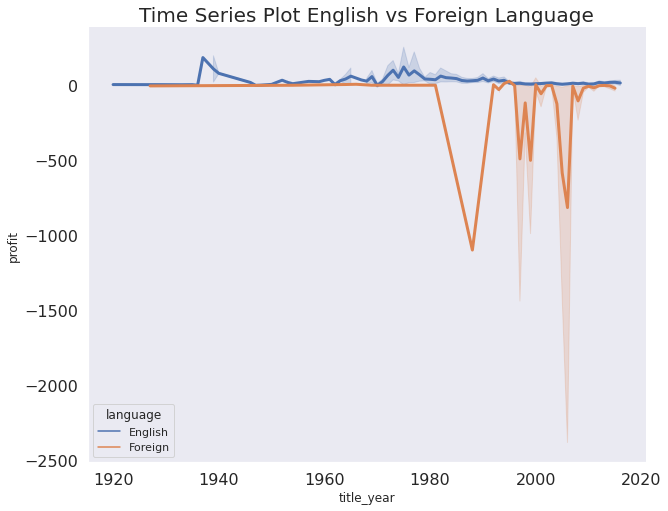

In [27]:
# Lets get time series plot for Profit and Loss
plt.figure(figsize=(10, 8))
sns.lineplot(data=df, x="title_year", y="profit", hue="language", linewidth=3)
plt.title("Time Series Plot English vs Foreign Language", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.despine()

In [28]:
# Lets get most lossed movies
df[df["profit"] < -2000][["movie_title", "language", "profit"]
                         ].sort_values(by="profit").style.background_gradient(cmap="Greens_r")

,movie_title,language,profit
2988,The Host,Foreign,-12213.298588
3859,Lady Vengeance,Foreign,-4199.788333
3005,Fateless,Foreign,-2499.804112
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510


In [29]:
# Convert gross data type to int
df["gross"] = df["gross"].astype("int")

# Get long duration movies gross and profit
print("Long duration movies gross and profit")
display(df[df["duration"] == "Long"][["movie_title", "duration", "gross", "profit"]].sort_values(
    by="profit", ascending=False).head(10).style.background_gradient(cmap="Greens"))

# Get short duration movies gross and profit
print("Short duration movies gross and profit")
display(df[df["duration"] == "Short"][["movie_title", "duration", "gross", "profit"]].sort_values(
    by="profit", ascending=False).head(10).style.background_gradient(cmap="Greens"))

Long duration movies gross and profit


,movie_title,duration,gross,profit
0,Avatar,Long,760505847,523.505847
29,Jurassic World,Long,652177271,502.177271
26,Titanic,Long,658672302,458.672302
3024,Star Wars: Episode IV - A New Hope,Long,460935665,449.935665
17,The Avengers,Long,623279547,403.279547
240,Star Wars: Episode I - The Phantom Menace,Long,474544677,359.544677
66,The Dark Knight,Long,533316061,348.316061
439,The Hunger Games,Long,407999255,329.999255
186,The Hunger Games: Catching Fire,Long,424645577,294.645577
697,Jurassic Park,Long,356784000,293.784000


Short duration movies gross and profit


,movie_title,duration,gross,profit
3080,E.T. the Extra-Terrestrial,Short,434949459,424.449459
509,The Lion King,Short,422783777,377.783777
812,Deadpool,Short,363024263,305.024263
521,Despicable Me 2,Short,368049635,292.049635
338,Finding Nemo,Short,380838870,286.838870
582,Shrek 2,Short,436471036,286.471036
2601,Home Alone,Short,285761243,267.761243
563,Minions,Short,336029560,262.029560
1181,The Sixth Sense,Short,293501675,253.501675
125,Frozen,Short,400736600,250.736600


/home/amol/Amol/Python/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


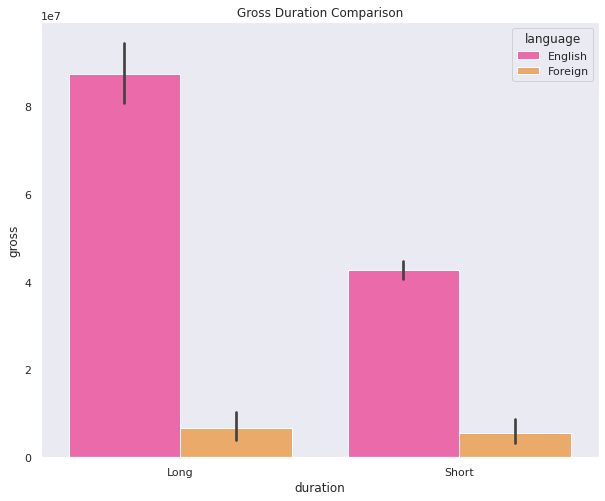

In [30]:
# Lets get how language and gross compared
plt.figure(figsize=(10, 8))
sns.barplot(df["duration"], df["gross"], hue=df["language"], palette="spring")
plt.title("Gross Duration Comparison")
plt.show()

Long Duration


,movie_title,duration,imdb_score
1937,The Shawshank Redemption,Long,9.300000
3466,The Godfather,Long,9.200000
66,The Dark Knight,Long,9.000000
2837,The Godfather: Part II,Long,9.000000
3355,Pulp Fiction,Long,8.900000


Short Duration


,movie_title,duration,imdb_score
3592,The Usual Suspects,Short,8.600000
3175,American History X,Short,8.600000
4427,Modern Times,Short,8.600000
2152,Raiders of the Lost Ark,Short,8.500000
3931,Samsara,Short,8.500000


/home/amol/Amol/Python/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


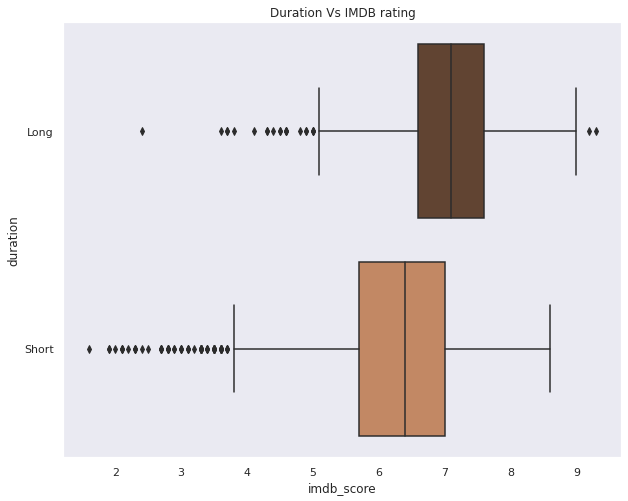

In [31]:
# Get highest and lowest rating for long and short duration
print("Long Duration")
display(df[df["duration"] == "Long"][["movie_title", "duration", "imdb_score"]].sort_values(by="imdb_score", ascending=False).head().style.background_gradient(cmap="Greens")
        )

print("Short Duration")
display(df[df["duration"] == "Short"][["movie_title", "duration", "imdb_score"]].sort_values(by="imdb_score", ascending=False).head().style.background_gradient(cmap="Greens")
        )
# Lets get relationship between duration and imdb rating
plt.figure(figsize=(10, 8))
sns.boxplot(df["imdb_score"], df["duration"], palette="copper")
plt.title("Duration Vs IMDB rating")
plt.show()